In [1]:
import pandas as pd

customers = pd.read_csv('cleaned_customer.csv')
products = pd.read_csv('productcatalog.csv')
categories = pd.read_csv('productcategory.csv')
sales = pd.read_csv('sales.csv')

In [1]:
import pandas as pd

# Load the customers file
customers = pd.read_csv('cleaned_customer.csv')

# Drop the '_id' column
customers = customers.drop(columns=['_id'])

# Save the updated DataFrame back to 'cleaned_customer.csv'
customers.to_csv('cleaned_customer.csv', index=False)

# Confirm the changes
print(customers.head())


                customer_id         dob gender
0  5e0f26a7cde91300013ef170  1983-03-28      M
1  5e0f6013c1715600015b373e  1980-12-14      M
2  5e0f62f564de75000129d91a  1984-12-10      F
3  5e1018a212124100011efdf1  1993-06-15    NaN
4  5e1018c912124100011f02af         NaN      M


**EDA**

In [4]:
print(customers.head())

                        _id               customer_id         dob gender
0  5e0f26a7cde91300013ef170  5e0f26a7cde91300013ef170  1983-03-28      M
1  5e0f6013c1715600015b373e  5e0f6013c1715600015b373e  1980-12-14      M
2  5e0f62f564de75000129d91a  5e0f62f564de75000129d91a  1984-12-10      F
3  5e1018a212124100011efdf1  5e1018a212124100011efdf1  1993-06-15    NaN
4  5e1018c912124100011f02af  5e1018c912124100011f02af         NaN      M


In [5]:
# General info for each table
for df, name in zip([customers, products, categories, sales], 
                    ['Customers', 'Products', 'Categories', 'Sales']):
    print(f"--- {name} Overview ---")
    print(df.info())
    print(df.describe(include='all'))
    print(df.head())
    print("\n")


--- Customers Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307345 entries, 0 to 307344
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   _id          307345 non-null  object
 1   customer_id  307345 non-null  object
 2   dob          14470 non-null   object
 3   gender       31830 non-null   object
dtypes: object(4)
memory usage: 9.4+ MB
None
                             _id               customer_id         dob gender
count                     307345                    307345       14470  31830
unique                    307345                    307345        8253      2
top     5e0f26a7cde91300013ef170  5e0f26a7cde91300013ef170  1970-01-01      F
freq                           1                         1         137  17905
                        _id               customer_id         dob gender
0  5e0f26a7cde91300013ef170  5e0f26a7cde91300013ef170  1983-03-28      M
1  5e0f6013c1715600015b373e  5

In [6]:
# Check for missing values in all tables
for df, name in zip([customers, products, categories, sales], 
                    ['Customers', 'Products', 'Categories', 'Sales']):
    print(f"Missing values in {name}:")
    print(df.isnull().sum())
    print("\n")


Missing values in Customers:
_id                 0
customer_id         0
dob            292875
gender         275515
dtype: int64


Missing values in Products:
product_id                0
product_name              0
product_description    3861
dtype: int64


Missing values in Categories:
product_id     0
category       0
category_id    0
dtype: int64


Missing values in Sales:
_id                    0
customer_id            0
product_id             0
quantity               0
purchased_date_time    0
dtype: int64




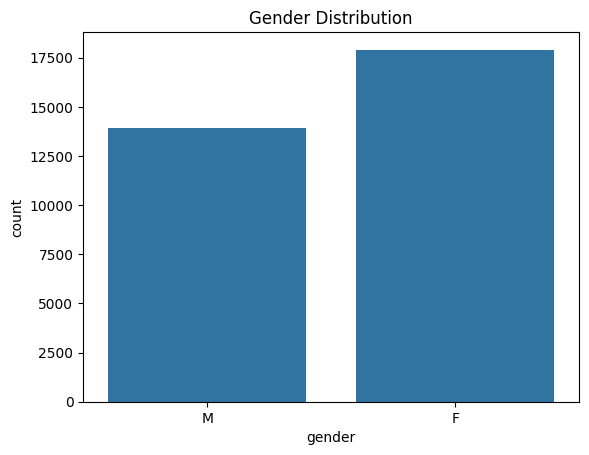

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=customers, x='gender')
plt.title("Gender Distribution")
plt.show()


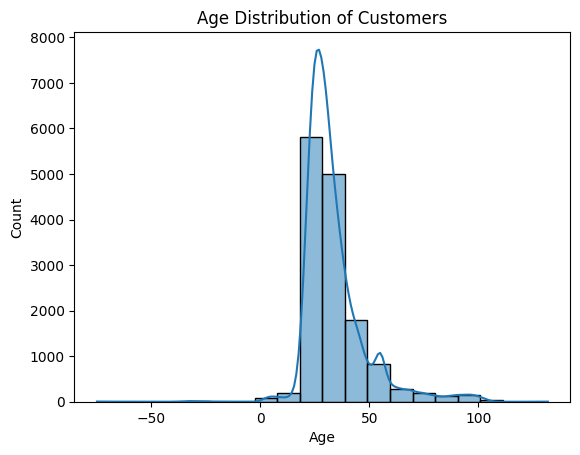

In [8]:
from datetime import datetime

customers['dob'] = pd.to_datetime(customers['dob'])
customers['age'] = datetime.now().year - customers['dob'].dt.year
sns.histplot(customers['age'], bins=20, kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.show()


In [9]:
keyword = 'baby'
matching_products = products[products['product_name'].str.contains(keyword, case=False, na=False)]
print(matching_products[['product_id', 'product_name']])


                     product_id  \
0      5d91c2d455544a0001fb6b77   
13     5d91c2dd55544a0001fb6c44   
45     5da6ba9c7b303a000166f312   
47     5da6ba9e7b303a000166f333   
175    5df88fb343d0000001080fcc   
...                         ...   
13150  66b9efd38e7643fe720398c9   
13375  66e915f1740b9d22b058fed2   
13376  66e917ef740b9d22b069f543   
13377  66e91b7a740b9d22b0ba4d63   
13378  66e92342740b9d22b040c6a7   

                                            product_name  
0      Mamaearth Milky Soft Baby Face Cream with Muru...  
13     Mamaearth Nourishing Baby Hair Oil Almond and ...  
45     Cetaphil Baby Massage Oil, With Shea Butter - ...  
47                      Cetaphil Baby Daily Lotion 400ml  
175                             Welcome Baby Starter Kit  
...                                                  ...  
13150                        Mamaearth Baby Care Combo 2  
13375  Kid-Gen Sunscreen Gel SPF 30 Baby & Kids Miner...  
13376                  Li-Baby Gentle Baby Shamp

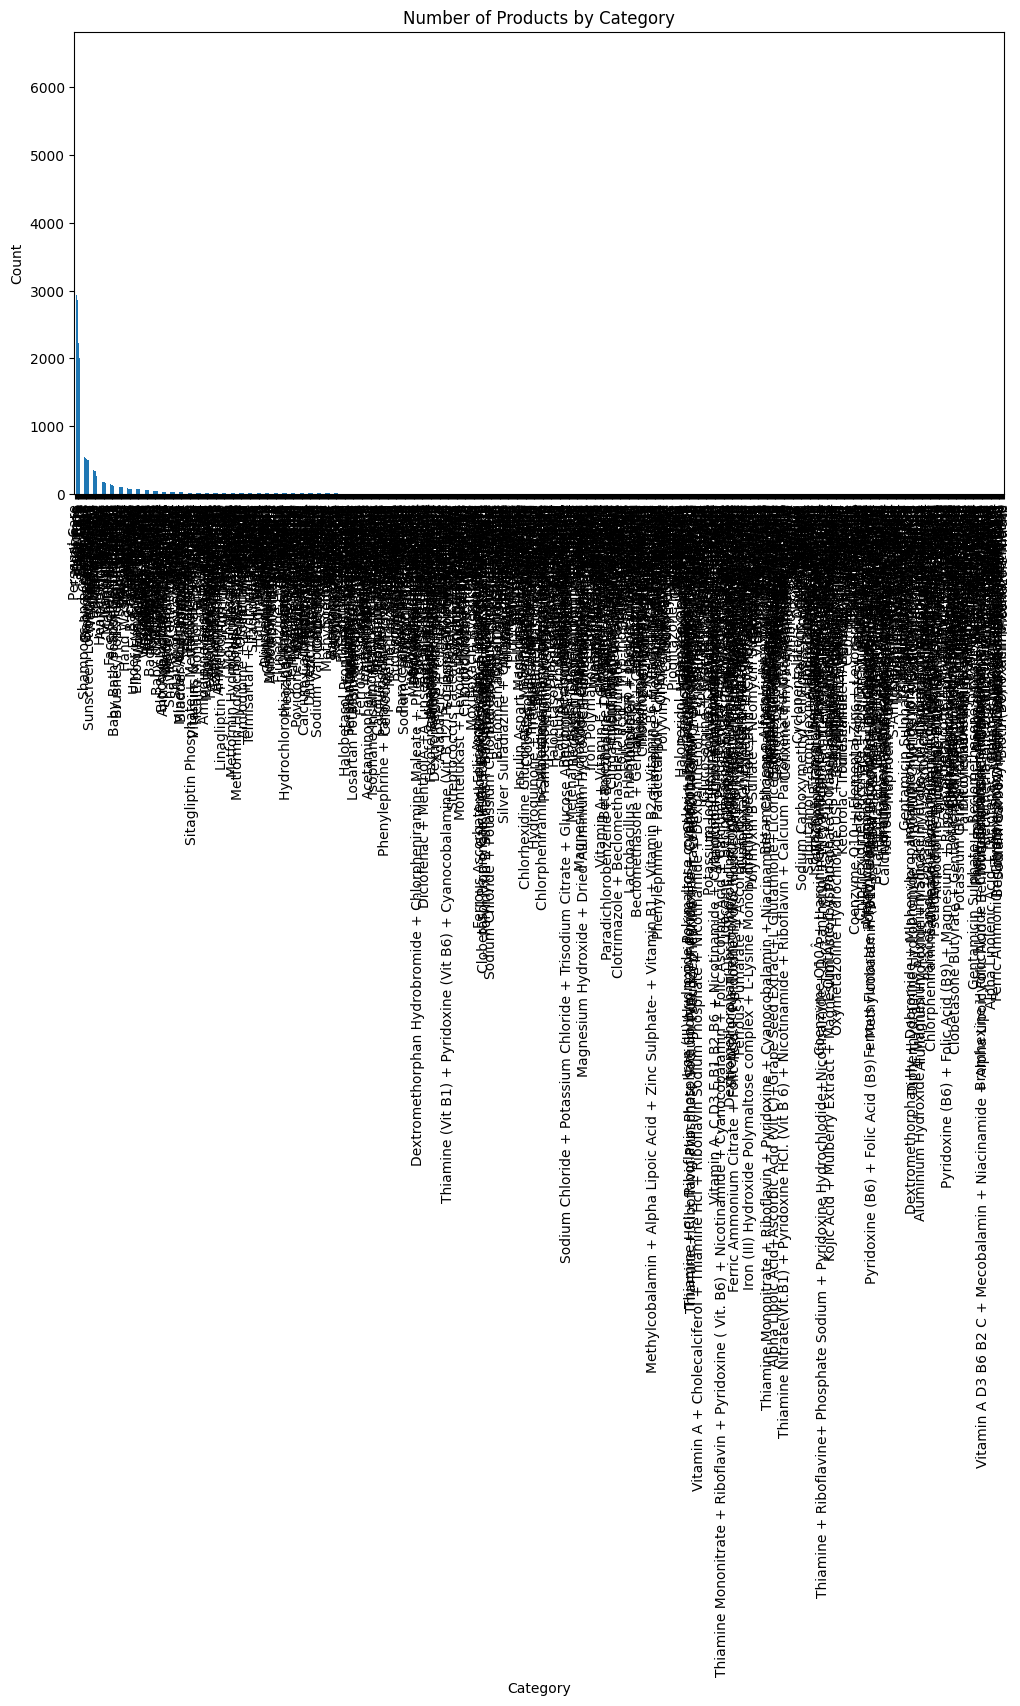

In [11]:
category_counts = categories['category'].value_counts()
category_counts.plot(kind='bar', figsize=(12, 6))
plt.title("Number of Products by Category")
plt.ylabel("Count")
plt.xlabel("Category")
plt.show()


C:\Users\kshet\AppData\Local\Temp\ipykernel_18348\4186971165.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  sales['month'] = sales['purchased_date_time'].dt.to_period('M')


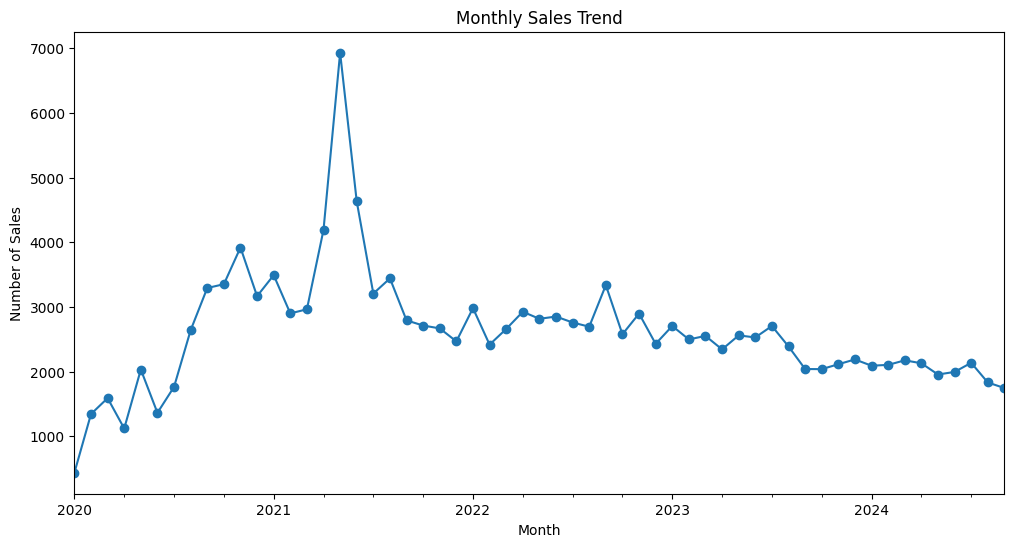

In [12]:
sales['purchased_date_time'] = pd.to_datetime(sales['purchased_date_time'])
sales['month'] = sales['purchased_date_time'].dt.to_period('M')

monthly_sales = sales.groupby('month').size()
monthly_sales.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Number of Sales")
plt.xlabel("Month")
plt.show()


Top 10 Products by Quantity Sold:
product_id
5e3d2697c656250001e066c9    5512
5e12cdb2f471d800013c6a3d    3785
5f2d338479468d0001916f08    3041
5e4ce1d36d451c0001aa4609    2677
5e174d02606d980001ad042d    2260
5df8cbdf5133bb0001bbbc1e    2135
5e391136f26c880001ebce59    2113
5e673eeb4c324a0001d131b5    1935
5f6c4e803c6691000115bb8e    1809
5e01ed5d4629120001321c9e    1717
Name: quantity, dtype: int64


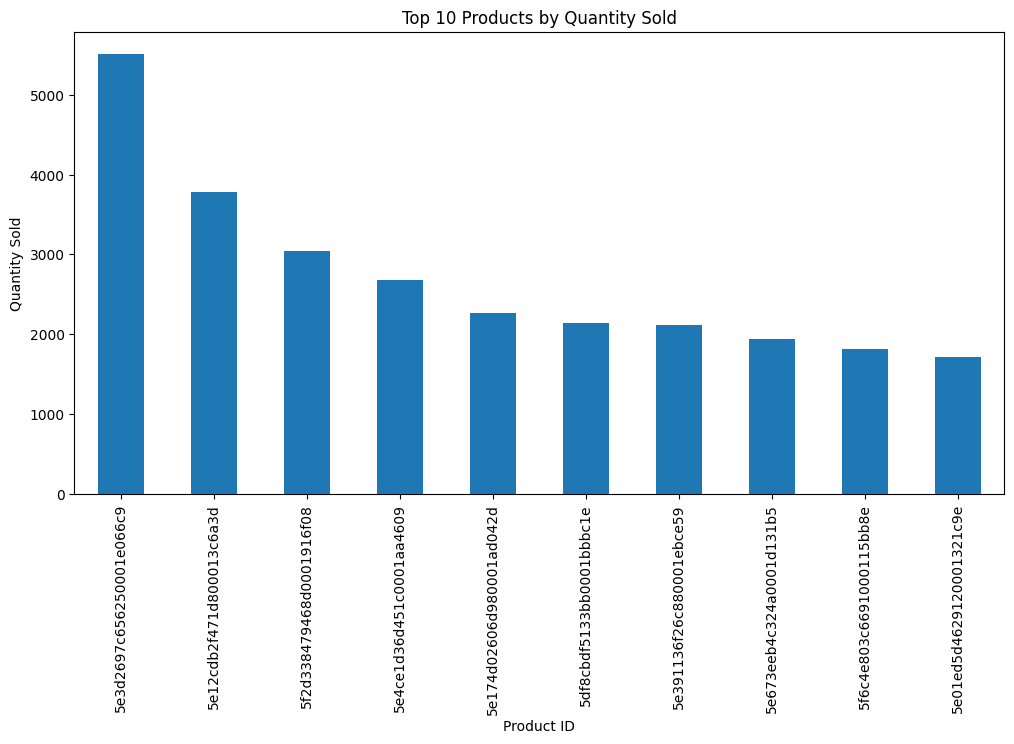

In [13]:
top_products = sales.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Quantity Sold:")
print(top_products)

# Visualize
top_products.plot(kind='bar', figsize=(12, 6))
plt.title("Top 10 Products by Quantity Sold")
plt.ylabel("Quantity Sold")
plt.xlabel("Product ID")
plt.show()


In [14]:
repeat_customers = sales['customer_id'].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1]
print(f"Number of Repeat Customers: {len(repeat_customers)}")


Number of Repeat Customers: 18488


In [15]:
sales_with_details = pd.merge(sales, categories, on='product_id', how='left')
sales_with_details = pd.merge(sales_with_details, products, on='product_id', how='left')

# Check merged structure
print(sales_with_details.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564976 entries, 0 to 564975
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   _id                  564976 non-null  object             
 1   customer_id          564976 non-null  object             
 2   product_id           564976 non-null  object             
 3   quantity             564976 non-null  int64              
 4   purchased_date_time  564976 non-null  datetime64[ns, UTC]
 5   month                564976 non-null  period[M]          
 6   category             563757 non-null  object             
 7   category_id          563757 non-null  object             
 8   product_name         564886 non-null  object             
 9   product_description  250417 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(7), period[M](1)
memory usage: 43.1+ MB
None


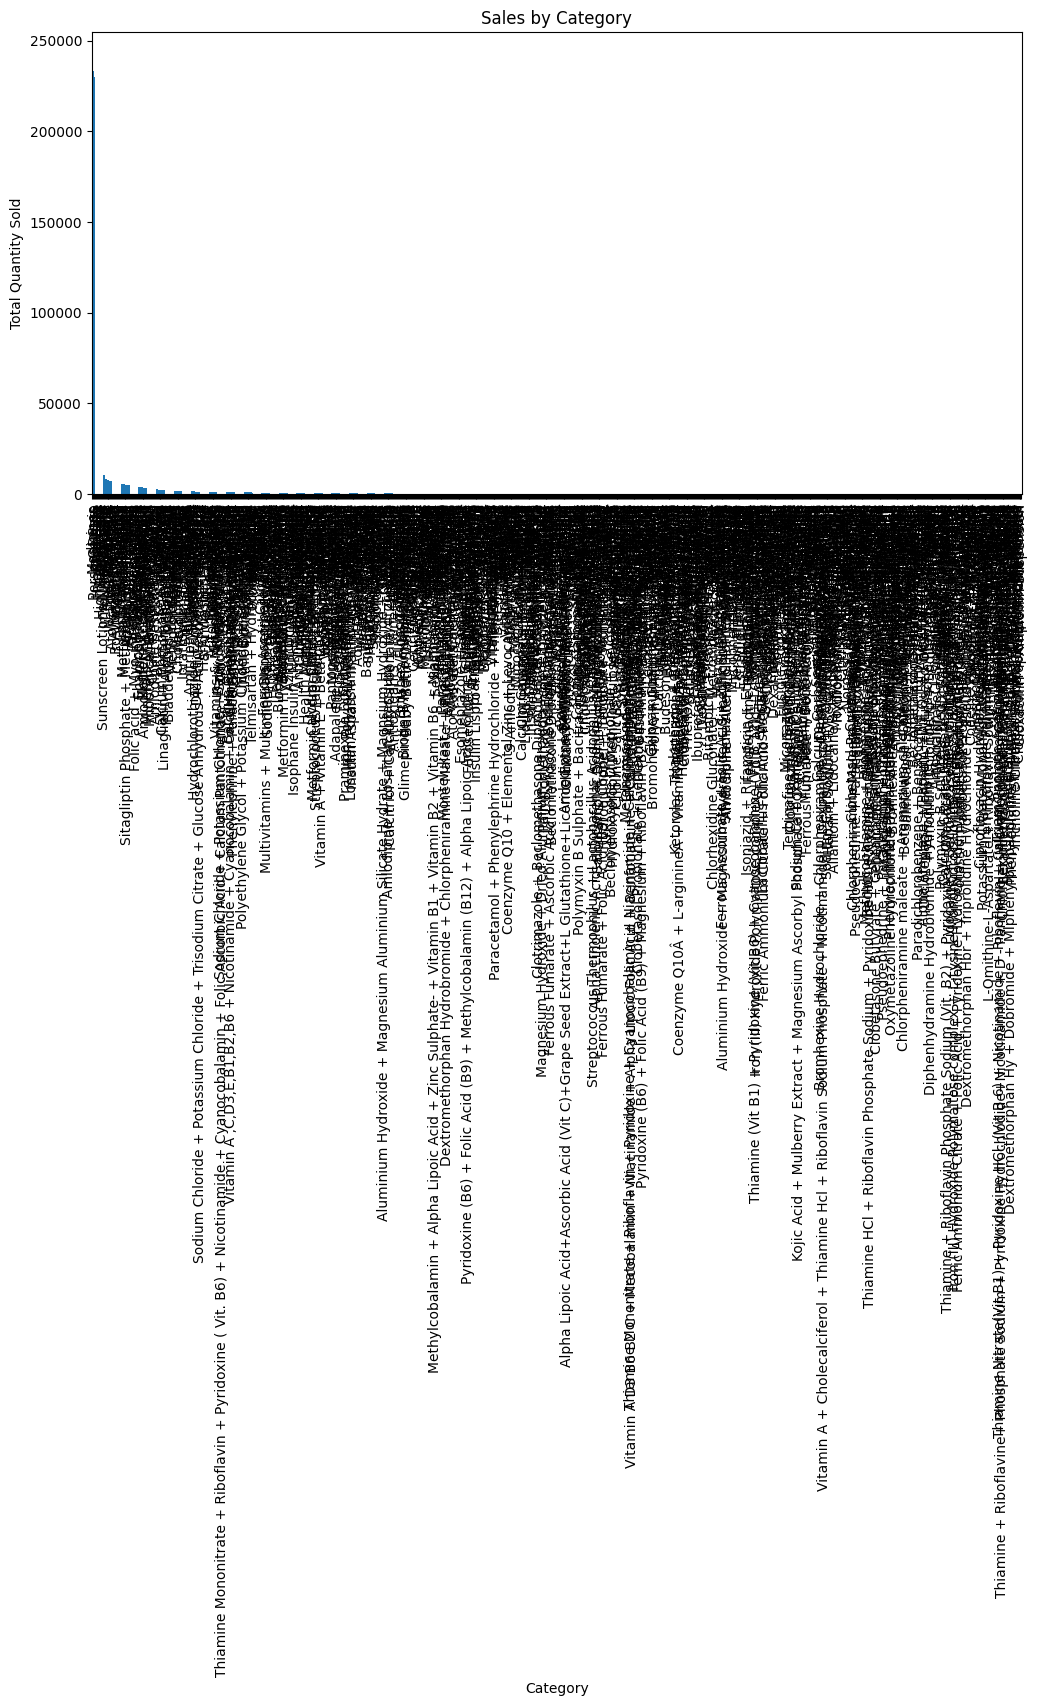

In [16]:
sales_by_category = sales_with_details.groupby('category')['quantity'].sum().sort_values(ascending=False)
sales_by_category.plot(kind='bar', figsize=(12, 6))
plt.title("Sales by Category")
plt.ylabel("Total Quantity Sold")
plt.xlabel("Category")
plt.show()


In [17]:
top_products_by_category = sales_with_details.groupby(['category', 'product_name'])['quantity'].sum()
top_products_by_category = top_products_by_category.sort_values(ascending=False).groupby(level=0).head(3)
print(top_products_by_category)


category                               product_name                    
Medicines                              Asvit Tablet 10'S                   11024
Drugs                                  Asvit Tablet 10'S                    5512
Ascorbic Acid                          Asvit Tablet 10'S                    5512
Supplement                             Asvit Tablet 10'S                    5512
Generic                                Asvit Tablet 10'S                    5512
                                                                           ...  
Povidone Iodine                        Ovidon Gargle 50ml 'Bottle              1
Polyvinyl Alcohol + Povidone Iodine    Ocuwet Eye Drops 10ml                   1
Piroxicam                              Dolonil -20 DT Tablet 10'S              1
Fexofenadine Hydrochloride Suspension  Alernil Suspension 100ml 'Bottle        1
Rifaximin                              Mixar 200mg Tablet 10'S                 1
Name: quantity, Length: 2093, dtype: 

1. Predicts the products that a customer is likely to purchase based on their past interactions.

In [4]:
import pandas as pd
# Merge sales with product details
sales_with_products = pd.merge(sales, products, on='product_id', how='left')
sales_with_products = pd.merge(sales_with_products, categories, on='product_id', how='left')

# Preview the merged dataset
print(sales_with_products.head())


                        _id               customer_id  \
0  5e10363c1212410001255b2c  5e1024dd1212410001218ff2   
1  5e10363c1212410001255b2c  5e1024dd1212410001218ff2   
2  5e10363c1212410001255b2c  5e1024dd1212410001218ff2   
3  5e1067a612124100012b3c80  5e103fea121241000126d997   
4  5e1067a612124100012b3c80  5e103fea121241000126d997   

                 product_id  quantity       purchased_date_time  \
0  5e0db9197bb5cb00011dbc91         1  2020-01-04T06:52:44.284Z   
1  5e0db9197bb5cb00011dbc91         1  2020-01-04T06:52:44.284Z   
2  5e0db9197bb5cb00011dbc91         1  2020-01-04T06:52:44.284Z   
3  5da59ebd23e99f0001240129         1  2020-01-04T10:23:34.472Z   
4  5da59ebd23e99f0001240129         1  2020-01-04T10:23:34.472Z   

                                        product_name  \
0                       2 Piece Double Layer Hot Bag   
1                       2 Piece Double Layer Hot Bag   
2                       2 Piece Double Layer Hot Bag   
3  Bioderma Photoderm AKN Mat 

In [5]:
# Create a pivot table with customer_id as rows and product_id as columns
interaction_matrix = sales_with_products.pivot_table(index='customer_id', 
                                                     columns='product_id', 
                                                     values='quantity', 
                                                     aggfunc='sum', 
                                                     fill_value=0)

print(interaction_matrix.head())


product_id                5d91c2d455544a0001fb6b77  5d91c2d555544a0001fb6b85  \
customer_id                                                                    
5c99cbe9d5e03b00015aadc4                         0                         0   
5e0f26a7cde91300013ef170                         3                         3   
5e0f6013c1715600015b373e                         0                         0   
5e0f62f564de75000129d91a                        30                         0   
5e0f668ed458ed00015187c6                         0                         0   

product_id                5d91c2d655544a0001fb6b94  5d91c2d655544a0001fb6ba3  \
customer_id                                                                    
5c99cbe9d5e03b00015aadc4                         0                         0   
5e0f26a7cde91300013ef170                         0                         0   
5e0f6013c1715600015b373e                         0                         0   
5e0f62f564de75000129d91a               

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

# Create a pivot table for user-product interaction
interaction_matrix = sales_with_products.pivot_table(index='customer_id', 
                                                     columns='product_id', 
                                                     values='quantity', 
                                                     aggfunc='sum', 
                                                     fill_value=0)

# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(interaction_matrix)

# Convert to DataFrame for ease of use
similarity_df = pd.DataFrame(similarity_matrix, 
                             index=interaction_matrix.index, 
                             columns=interaction_matrix.index)

# Recommend products
def recommend_products_simple(customer_id, top_n=5):
    # Get similar customers
    similar_customers = similarity_df[customer_id].sort_values(ascending=False).iloc[1:top_n+1].index
    
    # Get products purchased by similar customers
    recommended_products = sales_with_products[sales_with_products['customer_id'].isin(similar_customers)]
    recommended_products = recommended_products.groupby('product_id')['quantity'].sum().sort_values(ascending=False)
    
    # Return the top recommended products
    return pd.merge(recommended_products.head(10), products, on='product_id', how='left')

# Example: Recommend products for a specific customer
customer_id = '5e101faa1212410001203309'  # Replace with an actual customer_id
recommendations = recommend_products_simple(customer_id)
print(recommendations[['product_id', 'product_name', 'quantity']])


                 product_id  \
0  5e3d2697c656250001e066c9   
1  5e0ed3313546290001b86db2   
2  5e673eeb4c324a0001d131b5   
3  5e491c036d451c0001a4585b   
4  6093be9d687685fa59165f71   
5  5fc0ca6ae56c9800015ceffe   
6  5dfca98946291200012ea018   
7  5e391136f26c880001ebce59   
8  5e4ce1d36d451c0001aa4609   
9  5e413898bd50930001e516a1   

                                        product_name  quantity  
0                                  Asvit Tablet 10'S      2646  
1                            Becozinc-G Capsule 10'S       665  
2  Disposable Nonwoven Surgical Face Mask with Ea...       300  
3              Dettol Disinfectant Spray 225ml/170gm       150  
4                                 Corbic Tablet 10'S       100  
5  Dettol Disinfectant Spray Spring Blossom 225ml...        95  
6                         Refresh Tear Eye Drop 10ml        72  
7                               Niko 500 Tablet 10'S        66  
8                              Handiplast Waterproof        58  
9       

In [10]:
# Function to fetch all products purchased by a customer
def get_all_purchases(customer_id):
    # Filter the sales data for the given customer
    customer_purchases = sales[sales['customer_id'] == customer_id]
    
    # Merge with product details for meaningful output
    purchased_products = pd.merge(
        customer_purchases, 
        products, 
        on='product_id', 
        how='left'
    )
    
    # Select relevant columns
    return purchased_products[['product_id', 'product_name', 'purchased_date_time']]

customer_id = '5e101faa1212410001203309'  
all_purchases = get_all_purchases(customer_id)
print(all_purchases)


                   product_id  \
0    5e0888af2d1d6b00010fc4d9   
1    5e394388f26c880001022ac8   
2    5e01fb424629120001328582   
3    5df99c7f5133bb0001bd8318   
4    5e3d2697c656250001e066c9   
..                        ...   
122  5e059ff8d37ee90001419625   
123  5e0ed3493546290001b8741a   
124  5df8cbdf5133bb0001bbbbee   
125  5df8cbf65133bb0001bbc320   
126  5df99c655133bb0001bd7b42   

                                          product_name  \
0                         1 Piece Double Layer Hot Bag   
1                                    Elyte 21gm Sachet   
2    Palm Safe Foam Based Alcohol-Free Hand Sanitiz...   
3                              Panocid Dr Tablet 10 'S   
4                                    Asvit Tablet 10'S   
..                                                 ...   
122                                  Sinex Tablet 10'S   
123                                 Flexon Tablet 15'S   
124                                    Luzo Cream 30gm   
125                    

In [5]:
#top 5 products based on purchase history and frequency

sales_with_products = pd.merge(sales, products, on='product_id', how='left')

# Function to generate a purchase table and recommendations for a customer
def recommend_top_products(customer_id, sales_data, product_data, top_n=5):
    
    customer_purchases = sales_data[sales_data['customer_id'] == customer_id]
    
    purchase_table = customer_purchases.groupby('product_id')['quantity'].sum().reset_index()

    purchase_table = purchase_table.sort_values(by='quantity', ascending=False)
    
    purchase_table = pd.merge(purchase_table, product_data, on='product_id', how='left')
    
    recommendations = purchase_table.head(top_n)
    
    return recommendations[['product_id', 'product_name', 'quantity']]

customer_id = '5e1025021212410001219147'  
recommendations = recommend_top_products(customer_id, sales_with_products, products)
print(recommendations)


                 product_id                    product_name  quantity
0  5e26d48f7670570001a6bdb5          Fortiplex Capsule 10'S        20
1  5e3d2697c656250001e066c9               Asvit Tablet 10'S        20
2  5e26d4c47670570001a73889          Zinc DT 10 Tablet 10'S         2
3  5ea98a6e32c4fb00011767c2  Immuno Plus 90 Tablets 'Bottle         2
4  60701769e24cc70ce0690dc2      DV 60K Softgel Capsule 8'S         2


2. FIND UNCOMMON PRODUCTS THAT A CUSTOMER HAS PURCHASED COMPARED TO OTHER CUSTOMERS.

In [11]:
#frquency of purchase for all products low to high

# Merge sales with product details for product names
sales_with_products = pd.merge(sales, products, on='product_id', how='left')

# Generate purchase frequency for all products
purchase_frequency = sales_with_products.groupby('product_id').agg({'quantity': 'sum'}).reset_index()

# Merge with product names for better readability
purchase_frequency = pd.merge(purchase_frequency, products, on='product_id', how='left')

# Sort products by frequency in ascending order (lowest to highest)
purchase_frequency = purchase_frequency.sort_values(by='quantity', ascending=True)

# Display the result
print(purchase_frequency[['product_id', 'product_name', 'quantity']])


                    product_id                                   product_name  \
5925  619ca4d7a81248da73e12a8c                 Flamingo Premium Anklet (Pair)   
7804  649179e62a4fc24bf492763e                   Medimix Kumkumadi Soap 125gm   
7806  64940f732313ca9e3c4dc130                  Medimix Sandal Bodywash 300ml   
6599  624c24ef007a183214a58e4b  Brillare Science Real Mahabhringraj Oil 200ml   
7808  64955c7e687a6ffd9cb9c1db                                   Lipitop 20mg   
...                        ...                                            ...   
1540  5e174d02606d980001ad042d                        Pantop 40mg Tablet 10'S   
2280  5e4ce1d36d451c0001aa4609                          Handiplast Waterproof   
3096  5f2d338479468d0001916f08                                          Myo-D   
1426  5e12cdb2f471d800013c6a3d                        Ecosprin-75 Tablet 14'S   
2142  5e3d2697c656250001e066c9                              Asvit Tablet 10'S   

      quantity  
5925      

In [34]:
import pandas as pd

# Function to fetch all products purchased by a customer with their frequency
def get_all_purchases_with_frequency(customer_id):
    customer_purchases = sales[sales['customer_id'] == customer_id]
    purchased_products = pd.merge(customer_purchases, products, on='product_id', how='left')
    product_frequency = purchased_products.groupby(['product_id', 'product_name']).agg({'quantity': 'sum'}).reset_index()
    return product_frequency

# Function to get all uncommon products for a customer based on global product frequencies
def get_all_uncommon_products(customer_id, max_frequency):
    # Get all product frequencies across all customers
    sales_with_products = pd.merge(sales, products, on='product_id', how='left')
    global_product_frequency = sales_with_products.groupby('product_id').agg({'quantity': 'sum'}).reset_index()
    global_product_frequency = pd.merge(global_product_frequency, products, on='product_id', how='left')
    
    # Get the customer's product purchase frequency
    customer_purchases = get_all_purchases_with_frequency(customer_id)
    
    # Merge customer purchases with global product frequency data to find uncommon items
    merged_data = pd.merge(
        customer_purchases, 
        global_product_frequency, 
        on='product_id', 
        how='left', 
        suffixes=('_customer', '_global')
    )
    
    # Filter products that have been sold globally at most `max_frequency` times
    uncommon_products = merged_data[merged_data['quantity_global'] <= max_frequency]
    
    if uncommon_products.empty:
        print(f"No uncommon products found for customer {customer_id} sold globally at most {max_frequency} times.")
        return None

    return uncommon_products

# Main code to find all uncommon products for a customer
customer_id = '5e0f668ed458ed00015187c6'  
max_frequency = 300

uncommon_products = get_all_uncommon_products(customer_id, max_frequency)

if uncommon_products is not None:
    print(f"Products purchased by customer {customer_id} that have been sold globally at most {max_frequency} times:")
    print(uncommon_products[['product_id', 'product_name_customer', 'quantity_customer', 'quantity_global']])
else:
    print(f"No products found for customer {customer_id} with the global sales threshold {max_frequency}.")


Products purchased by customer 5e0f668ed458ed00015187c6 that have been sold globally at most 300 times:
                 product_id                        product_name_customer  \
0  5d91c2dc55544a0001fb6c2a  Mamaearth Argan Hairfall Control Mask 200ml   
2  5df8cbe45133bb0001bbbd86                         Mylod 10 Tablet 15'S   

   quantity_customer  quantity_global  
0                  1              212  
2                 10              261  


3. Get the top trending products within the last 2 months. Find top 25 similar products based on a search term.

import pandas as pd

# Load the sales data
sales = pd.read_csv('sales.csv')

# Convert the `purchased_date_time` column to datetime format
sales['purchased_date_time'] = pd.to_datetime(sales['purchased_date_time'])

# Find the latest date in the sales data
latest_date = sales['purchased_date_time'].max()

# Calculate the last two months
last_two_months_start = latest_date - pd.DateOffset(months=2)

# Display the results
print("Latest Date in Sales Data:", latest_date)
print("Start Date for Last Two Months:", last_two_months_start)


In [16]:
import pandas as pd

# Load the sales data
sales = pd.read_csv('sales.csv')

# Convert the `purchased_date_time` column to datetime format
sales['purchased_date_time'] = pd.to_datetime(sales['purchased_date_time'])

# Find the latest date in the sales data
latest_date = sales['purchased_date_time'].max()

# Calculate the last two months
last_two_months_start = latest_date - pd.DateOffset(months=2)

# Display the results
print("Latest Date in Sales Data:", latest_date)
print("Start Date for Last Two Months:", last_two_months_start)


Latest Date in Sales Data: 2024-09-25 22:52:51.189000+00:00
Start Date for Last Two Months: 2024-07-25 22:52:51.189000+00:00


In [17]:
import pandas as pd

# Load the sales data and product catalog
sales = pd.read_csv('sales.csv')
products = pd.read_csv('productcatalog.csv')

# Convert `purchased_date_time` to datetime
sales['purchased_date_time'] = pd.to_datetime(sales['purchased_date_time'])

# Determine the latest date and calculate the start date for the last two months
latest_date = sales['purchased_date_time'].max()
last_two_months_start = latest_date - pd.DateOffset(months=2)

# Filter sales data for the last two months
recent_sales = sales[sales['purchased_date_time'] >= last_two_months_start]

# Aggregate product sales by quantity
trending_products = (
    recent_sales.groupby('product_id')['quantity']
    .sum()
    .reset_index()
    .sort_values(by='quantity', ascending=False)
    .head(25)
)

# Merge with product catalog for product names
trending_products = pd.merge(
    trending_products,
    products[['product_id', 'product_name']],
    on='product_id',
    how='left'
)

# Display the top trending products
print("Top Trending Products in the Last Two Months:")
print(trending_products)


Top Trending Products in the Last Two Months:
                  product_id  quantity  \
0   5e4ce1d36d451c0001aa4609       210   
1   5df998b35133bb0001bd5e8c       163   
2   64e5cac4383fd0ae14331849       159   
3   5f2d338479468d0001916f08       120   
4   604d97e4f6719600019d70a6       114   
5   5df998b45133bb0001bd5ea4       113   
6   5df8cbdf5133bb0001bbbc06       104   
7   5e01ed4746291200013215fa       101   
8   5fa7e3e2eb20c000014f8c09       100   
9   5df8cbd05133bb0001bbb786        93   
10  5e01ed354629120001321076        80   
11  5e09d81ea47b590001f1a5ae        77   
12  5df8cbdf5133bb0001bbbc1e        75   
13  5e12cdb2f471d800013c6a3d        74   
14  5fa395dbeb20c00001a25330        66   
15  5e391c47f26c880001eff2eb        54   
16  5e174d02606d980001ad042d        52   
17  5df8cbdc5133bb0001bbbb2e        51   
18  5e391c46f26c880001eff2bb        50   
19  5f182a00f4c0c300011627c0        50   
20  5e3d2637c656250001e05004        44   
21  5e01ed5d4629120001321c9e  

3.2 Find top 25 similar products based on a search term.

In [19]:
from fuzzywuzzy import process
import pandas as pd

# Load the product catalog
products = pd.read_csv('productcatalog.csv')

def find_similar_products(search_term, products_df, top_n=25):
    
    # Extract product names for comparison
    product_names = products_df['product_name'].tolist()

    # Get the top matches using fuzzy string matching
    similar_products = process.extract(search_term, product_names, limit=top_n)

    # Convert to a DataFrame
    result = pd.DataFrame(similar_products, columns=['product_name', 'similarity_score'])
    
    # Merge to get product IDs
    result = pd.merge(
        result, 
        products_df[['product_id', 'product_name']], 
        on='product_name', 
        how='left'
    )
    return result[['product_id', 'product_name', 'similarity_score']]

# Example search term
search_term = "Dettol Spray"

# Find similar products
similar_products = find_similar_products(search_term, products)

# Display the results
print(f"Top 25 products similar to '{search_term}':")
print(similar_products)


Top 25 products similar to 'Dettol Spray':
                  product_id  \
0   5df66aac43d0000001f062ef   
1   5df88fb343d0000001080fed   
2   5e01fb3646291200013282d3   
3   5e01fb3646291200013282e4   
4   5e01fb3646291200013282f7   
5   5e01fb36462912000132830a   
6   5e01fb37462912000132831d   
7   5e01fb374629120001328330   
8   5e01fb374629120001328343   
9   5e01fb374629120001328356   
10  5e01fb384629120001328369   
11  5e01fb414629120001328519   
12  5e01fb424629120001328558   
13  5e01fb43462912000132859f   
14  5e01fb4346291200013285b2   
15  5e0328ed4629120001332352   
16  5e0328f54629120001332558   
17  5e083ac485305600013ae36c   
18  5e2154d75928310001709818   
19  5e2822182027c3000155e53c   
20  5e2822242027c3000155e896   
21  5e2822262027c3000155e926   
22  5e369e7f5d82f2000150f9ac   
23  5e391c35f26c880001efae7d   
24  5e43dce16d451c0001a6f4b3   

                                         product_name  similarity_score  
0                  Fixderma Salyzap Body Spray - 5

4.1 Upsell

In [ ]:
import pandas as pd
import re

# Load the product catalog
products = pd.read_csv('productcatalog.csv')

def extract_size(product_name):
    
    match = re.search(r'(\d+\s?(ml|gm|g|kg|L|l))', product_name, re.IGNORECASE)
    return match.group(1) if match else None

def find_up_selling_opportunities(products_df):
    
    # Extract size from product names
    products_df = products_df.copy()  # Create a copy to avoid SettingWithCopyWarning
    products_df.loc[:, 'size'] = products_df['product_name'].apply(extract_size)
    
    # Remove products without size information
    products_with_sizes = products_df.dropna(subset=['size']).copy()
    
    # Extract numeric value of sizes for sorting
    products_with_sizes.loc[:, 'numeric_size'] = products_with_sizes['size'].apply(
        lambda x: int(re.search(r'\d+', x).group())
    )
    
    # Sort products by name and size
    sorted_products = products_with_sizes.sort_values(by=['product_name', 'numeric_size'])
    
    # Group by product name to identify size variations
    grouped = sorted_products.groupby('product_name')[['product_id', 'size', 'numeric_size']].apply(
        lambda x: x.reset_index(drop=True)
    )
    return grouped

# Find products with up-sell opportunities
up_selling_opportunities = find_up_selling_opportunities(products)

# Display the result
print("Products with Up-Sell Opportunities:")
print(up_selling_opportunities)


Products with Up-Sell Opportunities:
                                                                    product_id  \
product_name                                                                     
1 Al Syrup 30ml 'Bottle                            0  5e0847a185305600013b1d39   
100% Whey Gold Standard 1 lbs                      0  5de8da2a9300920001706981   
100% Whey Gold Standard 1.47 lbs                   0  65268c55e0498d9868b6bbac   
100% Whey Gold Standard 10 lbs                     0  5de8e027eada75000179bdac   
100% Whey Gold Standard 2 lbs                      0  5de8dea29300920001723594   
...                                                                        ...   
jina alchemy cleansing balm make up remover 100gm  0  660a329c5f732d54f60f3c92   
mCaffeine Naked & Raw Coffee Scalp & Hair Oil f... 0  615d920eae429bf51bea773c   
mee mee baby shampoo 500 ml                        0  65fa73d2a64a250a0a8798f6   
origo moistphil moisturizing lotion 200ml          0  660e241

In [ ]:
def upsell_recommendations(base_product_id, products_df):
    
    # Extract size from product names
    products_df = products_df.copy()  # Create a copy to avoid SettingWithCopyWarning
    products_df.loc[:, 'size'] = products_df['product_name'].apply(extract_size)
    
    # Remove products without size information
    products_with_sizes = products_df.dropna(subset=['size']).copy()
    
    # Extract numeric value of sizes for sorting
    products_with_sizes.loc[:, 'numeric_size'] = products_with_sizes['size'].apply(
        lambda x: int(re.search(r'\d+', x).group())
    )
    
    # Get the base product details
    base_product = products_with_sizes[products_with_sizes['product_id'] == base_product_id]
    if base_product.empty:
        return f"Product ID {base_product_id} not found."
    
    base_product_name = base_product.iloc[0]['product_name']
    base_product_size = base_product.iloc[0]['numeric_size']
    
    # Filter products with the same base name and larger size
    similar_products = products_with_sizes[
        (products_with_sizes['product_name'].str.contains(base_product_name.split()[0], case=False)) &
        (products_with_sizes['numeric_size'] > base_product_size)
    ].sort_values(by='numeric_size')
    
    # Return up-sell recommendations
    if similar_products.empty:
        return f"No up-sell opportunities found for Product ID {base_product_id} ({base_product_name})."
    
    return similar_products[['product_id', 'product_name', 'size']]

# Example usage
base_product_id = '5da6baa97b303a000166f3e5'  # Replace with a valid product ID
upsell_recommendation = upsell_recommendations(base_product_id, products)
print("Up-Sell Recommendations:")
print(upsell_recommendation)


Up-Sell Recommendations:
                     product_id  \
9849   62cc0920916f323fe162e575   
63     5da6baab7b303a000166f3fb   
10365  636a4983fd557e2ea0dcc0fc   
10362  636a2862fd557e2ea073a720   
10364  636a44e3fd557e2ea0999dae   
62     5da6baaa7b303a000166f3f0   
8289   61b09a1c953e2cb0d7f68dfe   
44     5da6ba9c7b303a000166f307   
50     5da6baa17b303a000166f35f   
51     5da6baa27b303a000166f36a   
38     5da6ba967b303a000166f2c7   
39     5da6ba987b303a000166f2d0   
55     5da6baa57b303a000166f3a3   
41     5da6ba9a7b303a000166f2e6   
40     5da6ba997b303a000166f2db   
8288   61b092003e553d27988ae47e   
65     5da6baad7b303a000166f411   
8294   61b0a16f953e2cb0d73836db   
8295   61b0a22a953e2cb0d73f1bd5   
7583   614afdfb2a149a9554220b10   
52     5da6baa37b303a000166f377   
11846  654cafe187217da46a06826a   
42     5da6ba9b7b303a000166f2f1   
56     5da6baa67b303a000166f3ae   
60     5da6baa97b303a000166f3da   
45     5da6ba9c7b303a000166f312   
8341   61b70ed4c70315faaaba143

In [26]:
import re

def extract_size(product_name):
    
    match = re.search(r'\d+\s?(ml|g|kg|l|oz)', product_name.lower())
    return match.group() if match else None

def numeric_size(size):
    
    if not size:
        return None
    match = re.search(r'\d+', size)
    return int(match.group()) if match else None

def upsell_recommendations(base_product_id, products_df):
    
    # Extract size and numeric size for all products
    products_df = products_df.copy()
    products_df['size'] = products_df['product_name'].apply(extract_size)
    products_df['numeric_size'] = products_df['size'].apply(numeric_size)
    
    # Get the base product details
    base_product = products_df[products_df['product_id'] == base_product_id]
    if base_product.empty:
        return f"Product ID {base_product_id} not found."
    
    base_product_name = base_product.iloc[0]['product_name']
    base_product_size = base_product.iloc[0]['numeric_size']
    if base_product_size is None:
        return f"No size information found for Product ID {base_product_id} ({base_product_name})."
    
    # Normalize product names by removing size information for exact name matching
    products_df['normalized_name'] = products_df['product_name'].str.replace(r'\d+\s?(ml|g|kg|l|oz)', '', regex=True).str.strip()
    base_product_normalized_name = re.sub(r'\d+\s?(ml|g|kg|l|oz)', '', base_product_name, flags=re.IGNORECASE).strip()
    
    # Filter products with the same normalized name and larger size
    upsell_candidates = products_df[
        (products_df['normalized_name'] == base_product_normalized_name) &
        (products_df['numeric_size'] > base_product_size)
    ].sort_values(by='numeric_size')
    
    # Return recommendations
    if upsell_candidates.empty:
        return f"No up-sell opportunities found for Product ID {base_product_id} ({base_product_name})."
    
    return upsell_candidates[['product_id', 'product_name', 'size']]

# Example usage
base_product_id = '5de8dea29300920001723594'  # Replace with a valid product ID
upsell_recommendation = upsell_recommendations(base_product_id, products)
print("Up-Sell Recommendations:")
print(upsell_recommendation)


Up-Sell Recommendations:
                   product_id                    product_name  size
105  5de8ded29300920001724e35   100% Whey Gold Standard 5 lbs   5 l
106  5de8e027eada75000179bdac  100% Whey Gold Standard 10 lbs  10 l


In [37]:
import pandas as pd
import re

def extract_size(product_name):
    match = re.search(r'\d+\s?(ml|g|kg|l|oz)', product_name.lower())
    return match.group() if match else None

def numeric_size(size):
    if not size:
        return None
    match = re.search(r'\d+', size)
    return int(match.group()) if match else None

def upsell_recommendations_by_customer(customer_id, sales_df, products_df):
    # Extract size and numeric size for all products
    products_df = products_df.copy()
    products_df['size'] = products_df['product_name'].apply(extract_size)
    products_df['numeric_size'] = products_df['size'].apply(numeric_size)
    
    # Get the products purchased by the customer
    customer_purchases = sales_df[sales_df['customer_id'] == customer_id]
    purchased_products = pd.merge(customer_purchases, products_df, on='product_id', how='left')
    
    # If the customer hasn't purchased anything, return a message
    if purchased_products.empty:
        return f"No products found for Customer ID {customer_id}."
    
    # Normalize product names by removing size information for exact name matching
    products_df['normalized_name'] = products_df['product_name'].str.replace(r'\d+\s?(ml|g|kg|l|oz)', '', regex=True).str.strip()
    purchased_products['normalized_name'] = purchased_products['product_name'].str.replace(r'\d+\s?(ml|g|kg|l|oz)', '', regex=True).str.strip()
    
    upsell_recommendations = []

    # Loop through each purchased product to find upsell recommendations
    for _, row in purchased_products.iterrows():
        base_product_name = row['normalized_name']
        base_product_size = row['numeric_size']
        
        if base_product_size is None:
            continue
        
        # Filter products with the same normalized name and larger size
        upsell_candidates = products_df[
            (products_df['normalized_name'] == base_product_name) & 
            (products_df['numeric_size'] > base_product_size)
        ].sort_values(by='numeric_size')
        
        # Add the upsell candidates to the recommendation list
        if not upsell_candidates.empty:
            upsell_recommendations.append(upsell_candidates[['product_id', 'product_name', 'size']])
    
    # If no upsell candidates are found, return a message
    if not upsell_recommendations:
        return f"No up-sell opportunities found for Customer ID {customer_id}."
    
    # Return all upsell recommendations
    return pd.concat(upsell_recommendations)


customer_id = '5ec62f76ea3b06000197c3ba'  
upsell_recommendation = upsell_recommendations_by_customer(customer_id, sales, products)
print("Up-Sell Recommendations for Customer ID:", customer_id)
print(upsell_recommendation)


Up-Sell Recommendations for Customer ID: 5ec62f76ea3b06000197c3ba
                   product_id                    product_name  size
106  5de8e027eada75000179bdac  100% Whey Gold Standard 10 lbs  10 l


4.2 Cross Sell

In [18]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules

def get_transactions_for_time_frame(time_frame='120d'):
    sales['purchased_date_time'] = pd.to_datetime(sales['purchased_date_time'])
    end_time = sales['purchased_date_time'].max()
    start_time = end_time - pd.Timedelta(time_frame)
    
    print(f"Filtering transactions from {start_time} to {end_time}")
    filtered_sales = sales[sales['purchased_date_time'] >= start_time]
    print(f"Number of transactions after filtering: {len(filtered_sales)}")
    
    transactions = filtered_sales.groupby('customer_id')['product_id'].apply(list)
    print(f"Number of customers with transactions: {len(transactions)}")
    return transactions

def generate_association_rules(min_support=0.001, time_frame='7d'):
    transactions = get_transactions_for_time_frame(time_frame)
    
    basket = transactions.apply(lambda x: pd.Series({item: 1 for item in x})).fillna(0)
    basket = basket.astype(int)
    
    print("Basket shape:", basket.shape)
    print("Basket head:\n", basket.head())
    
    if basket.empty or basket.sum(axis=1).max() < 2:
        print("No sufficient transactions for association rules.")
        return pd.DataFrame()
    
    frequent_itemsets = fpgrowth(basket, min_support=min_support, use_colnames=True)
    print(f"Number of frequent itemsets: {len(frequent_itemsets)}")
    print(frequent_itemsets.head())
    
    if frequent_itemsets.empty:
        print("No frequent itemsets found.")
        return pd.DataFrame()
    
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.01)
    return rules

# Generate rules
rules = generate_association_rules(min_support=0.001, time_frame='30d')

if rules.empty:
    print("No association rules generated.")
else:
    print("Generated association rules:\n", rules)


Filtering transactions from 2024-08-26 22:52:51.189000+00:00 to 2024-09-25 22:52:51.189000+00:00
Number of transactions after filtering: 2032
Number of customers with transactions: 1011
Basket shape: (1011, 1179)
Basket head:
                           64e2fe87383fd0ae1412226b  5e1478e95b329100018b5a4b  \
customer_id                                                                    
5e0f26a7cde91300013ef170                         1                         1   
5e10212c121241000120a71b                         0                         0   
5e1026741212410001221882                         0                         0   
5e1026ee1212410001222728                         0                         0   
5e102748121241000122465a                         0                         0   

                          5e1478ea5b329100018b5a63  653f940f214f302ec72e3c4e  \
customer_id                                                                    
5e0f26a7cde91300013ef170                         1  

c:\Users\kshet\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [19]:
rules.to_csv('association_rules.csv', index=False)

In [20]:
import pandas as pd

# Load the rules from the saved CSV
rules = pd.read_csv('association_rules.csv')

# Load the product catalog to get product names
product_catalog = pd.read_csv('productcatalog.csv')  # Assuming the catalog contains 'product_id' and 'product_name'

# Function to recommend products based on input product_id
def get_cross_sell_recommendations(product_id):
    # Find rules where the input product is in the antecedents
    recommendations = rules[rules['antecedents'].apply(lambda x: product_id in eval(x))]

    if recommendations.empty:
        return f"No recommendations found for product ID: {product_id}"
    
    # Map product names
    original_product_name = product_catalog.loc[product_catalog['product_id'] == product_id, 'product_name'].values[0]
    recommended_products = []
    
    for consequent in recommendations['consequents']:
        consequent_ids = eval(consequent)  # Convert string representation of list back to list
        for cid in consequent_ids:
            recommended_products.append(product_catalog.loc[product_catalog['product_id'] == cid, 'product_name'].values[0])
    
    return original_product_name, recommended_products

# Example Usage
input_product_id = '5f68225b3c66910001e4decc'  
original_product, recommendations = get_cross_sell_recommendations(input_product_id)

if recommendations:
    print(f"Original Product: {original_product}")
    print("Recommended Products:")
    for rec in recommendations:
        print(f"- {rec}")
else:
    print("No recommendations found.")


Original Product: DV 2K Capsule 10'S
Recommended Products:
- Cal-K7 Capsule 30'Bottle


In [5]:
import pandas as pd

# Load the association rules and product catalog
rules = pd.read_csv('association_rules.csv')


# Create a dictionary for quick lookup of product names
product_name_map = dict(zip(products['product_id'], products['product_name']))

# Function to map product IDs to names
def map_ids_to_names(product_ids):
    product_ids = eval(product_ids)  # Convert string representation of set to actual set
    return {product_name_map.get(pid, f"Unknown ({pid})") for pid in product_ids}

# Apply mapping to antecedents and consequents
rules['antecedents'] = rules['antecedents'].apply(map_ids_to_names)
rules['consequents'] = rules['consequents'].apply(map_ids_to_names)



# Display the last 10 rows of antecedents and consequents only
last_ten = rules[['antecedents', 'consequents']].tail(10)

# Print the result
print(last_ten.to_string(index=False))



                                                                                     antecedents                                                                                      consequents
                                {COSIQ NMF 15% Airgel for Normal to Oily Skin Moisturizer 100ml}                                                     {COSRX Full Fit Propolis Synergy Toner 50ml}
                                                    {COSRX Full Fit Propolis Synergy Toner 50ml}                                 {COSIQ NMF 15% Airgel for Normal to Oily Skin Moisturizer 100ml}
                                                               {Durex Mutual Climax Condoms 3'S}                                                                   {Durex Extra Thin Condoms 3'S}
                                                                  {Durex Extra Thin Condoms 3'S}                                                                {Durex Mutual Climax Condoms 3'S}
                         {Pee 